In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/ML-Assignment-2/data2.txt'

In [3]:
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [15]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

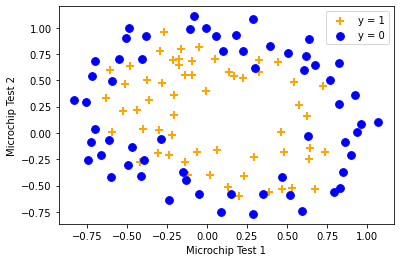

In [16]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [17]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

In [18]:
def mapFeature( x1col, x2col):
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [19]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 28)


In [20]:
# from scipy.special import expit #Vectorized sigmoid function

# #Hypothesis function and cost function for logistic regression
# def h(mytheta,myX): #Logistic hypothesis function
#     return expit(np.dot(myX,mytheta))



def sigmoid(z):
   s = 1 / (1 + np.exp(-z))
   return s

In [21]:
def initialize_with_zeros(dim):
    w = np.zeros([dim, 1])
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [76]:

# #Cost function, default lambda (regularization) 0
# def computeCost(mytheta,myX,myy,mylambda = 0.): 

#     m = myy.size # number of training examples

#     term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
#     term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
#     regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
#     return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )


def propagate(w, X, Y, lambd = 0.):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X))
    cost = (-1 / m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A))) + (lambd/(2*m)) * np.sum(np.dot(w, w.T))
    dw = (1 / m) * np.dot(X, (A - Y).T) + (lambd /m) * w
    return dw, cost

In [23]:
XX = XX.T

In [24]:
w, b = initialize_with_zeros(XX.shape[0])
print(XX.shape)
print(w.shape)
print(y.shape)

(28, 118)
(28, 1)
(118, 1)


In [74]:
def optimize(w, X, Y, num_iterations, learning_rate, print_cost = False, lambd  = 0):

    
    costs = []
    mincost = 0
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        dw, cost = propagate(w, X, Y, lambd)
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        ### END CODE HERE ###
        
        # Record the costs
        mincost = cost
        if i % 10000 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    
    return w, mincost

In [75]:
# dw, cost = propagate(w, XX, y.T)
w, mincost = optimize(w, XX, y.T, num_iterations= 1000000, learning_rate = 0.001, print_cost = False, lambd = 1)
print(w)
print(mincost)

NameError: ignored

In [ ]:
from scipy import optimize
initial_theta = np.zeros((XX.shape[1],1))
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y)
print(theta)
print(mincost)

In [68]:
def plotBoundary(Nw, XX, y, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    # theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    w, mincost = optimize(Nw, XX, y.T, num_iterations= 1000000, learning_rate = 0.001, print_cost = False, lambd=mylambda)
    print(w, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(w.T,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

[[ 3.25244274]
 [ 2.30608816]
 [ 3.5688447 ]
 [-5.0283261 ]
 [-4.11115661]
 [-4.9824597 ]
 [ 1.02420559]
 [-1.50817108]
 [-0.9483372 ]
 [-0.33271507]
 [-4.10498621]
 [ 0.28791734]
 [-2.18809451]
 [-1.54637329]
 [-3.3736672 ]
 [-0.60856201]
 [-0.70798831]
 [ 0.42613897]
 [-1.29118117]
 [-1.49517217]
 [-0.24580746]
 [-3.25834248]
 [ 0.37348819]
 [-0.97043145]
 [ 0.2946388 ]
 [-1.3071119 ]
 [-1.14328699]
 [-1.68066442]] 

Cost :  0.34042056526759507 
 
 
[[ 1.14213145]
 [ 0.60132088]
 [ 1.167178  ]
 [-1.87174401]
 [-0.9157084 ]
 [-1.2695127 ]
 [ 0.12668332]
 [-0.36873221]
 [-0.3451998 ]
 [-0.17376403]
 [-1.42385891]
 [-0.04858534]
 [-0.60641603]
 [-0.26931731]
 [-1.16315361]
 [-0.24309538]
 [-0.20708119]
 [-0.04320545]
 [-0.28027399]
 [-0.28695651]
 [-0.46911904]
 [-1.03618109]
 [ 0.02921455]
 [-0.29262298]
 [ 0.01734985]
 [-0.32896723]
 [-0.13795881]
 [-0.93200876]] 

Cost :  0.8613529293511011 
 
 
[[ 0.21471371]
 [-0.00759417]
 [ 0.17609632]
 [-0.40128043]
 [-0.11744862]
 [-0.23187723]

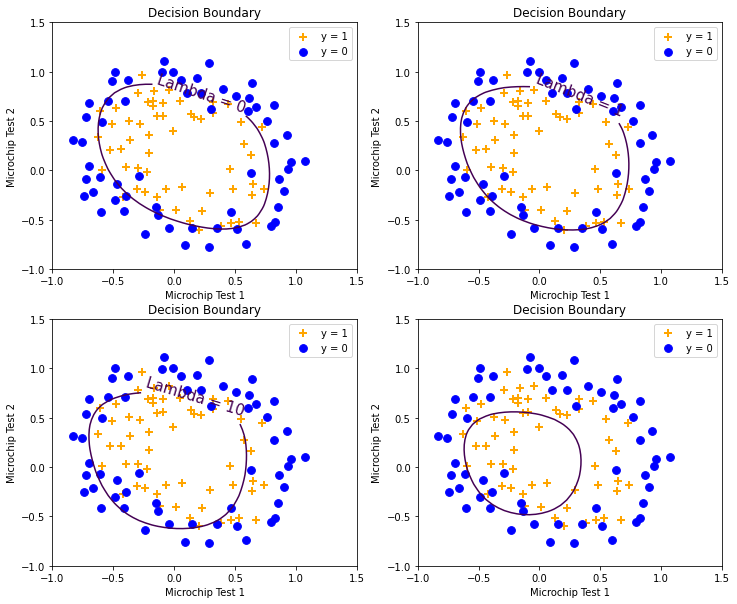

In [78]:
Nw, b = initialize_with_zeros(XX.shape[0])

plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(Nw,XX,y,50.)